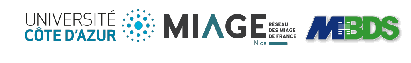

##### Deep Bridge - Nader CHATTI



# **Analyse statistique à partir des données du fichier CSV**

## Importation de l’environnement / Initialisation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

## Chargement des données

In [ ]:
# Accéder à My Google Drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/Dataset_Brain_MRI/data.csv"
data = pd.read_csv(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Prétraitement des données

In [ ]:
# Suppression des valeurs NAN
#data = data.dropna()

#Suppression de la colone Patient
#data = data.drop('Patient',axis=1)
data.head(10)

Patient  RNASeqCluster  MethylationCluster  ...  race  ethnicity  death01
0  TCGA_CS_4941            2.0                 4.0  ...   3.0        2.0      1.0
1  TCGA_CS_4942            1.0                 5.0  ...   2.0        NaN      1.0
2  TCGA_CS_4943            1.0                 5.0  ...   3.0        NaN      0.0
3  TCGA_CS_4944            NaN                 5.0  ...   3.0        NaN      0.0
4  TCGA_CS_5393            4.0                 5.0  ...   3.0        NaN      0.0
5  TCGA_CS_5395            2.0                 4.0  ...   2.0        NaN      1.0
6  TCGA_CS_5396            3.0                 3.0  ...   3.0        2.0      0.0
7  TCGA_CS_5397            NaN                 4.0  ...   3.0        2.0      1.0
8  TCGA_CS_6186            2.0                 4.0  ...   3.0        2.0      1.0
9  TCGA_CS_6188            2.0                 4.0  ...   3.0        2.0      0.0

[10 rows x 18 columns]

## Graph Nombre de morts par âges

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


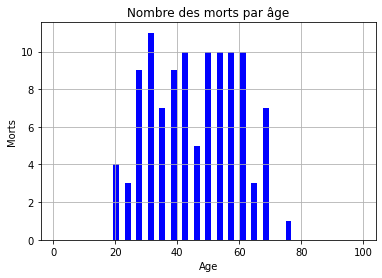

In [ ]:
range = (0, 100)

# Somme du nombre de morts
nbMorts = int(np.sum(data.death01))

plt.hist(data.age_at_initial_pathologic, nbMorts, range, color='blue',
         histtype='bar', rwidth=0.5)

plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Morts')
plt.title('Nombre des morts par âge')

plt.show()

## Graph Tumor Location

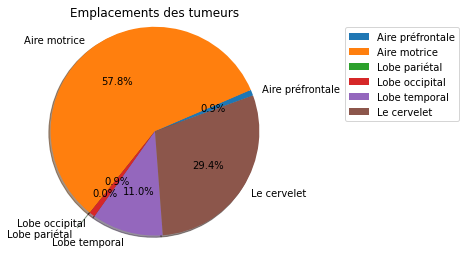

Aire préfrontale:  1  - Aire motrice:  63  - Lobe pariétal:  0  - Lobe occipital:  1  - Lobe temporal:  12  - Le cervelet:  32


In [ ]:
items = ['Aire préfrontale', 'Aire motrice', 'Lobe pariétal', 'Lobe occipital', 'Lobe temporal', 'Le cervelet']
loc1, loc2, loc3, loc4, loc5, loc6 = 0, 0, 0, 0, 0, 0
for i in data.tumor_location:
  if i == 1.0:
    loc1 = loc1 + 1
  if i == 2.0:
    loc2 = loc2 + 1
  if i == 3.0:
    loc3 = loc3 + 1
  if i == 4.0:
    loc4 = loc4 + 1
  if i == 5.0:
    loc5 = loc5 + 1
  if i == 6.0:
    loc6 = loc6 + 1

proportions = [loc1, loc2, loc3, loc4, loc5, loc6]

colors = ['r', 'y', 'g', 'b','g', 'b']

plt.pie(proportions, labels = items,
        startangle = 20, shadow = True, explode = (0, 0, 0.2, 0, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')

plt.title('Emplacements des tumeurs')
plt.legend(bbox_to_anchor=(1.35,1), loc="upper left")
plt.show()

print("Aire préfrontale: ", loc1, " - Aire motrice: ", loc2, " - Lobe pariétal: ", loc3, " - Lobe occipital: ", loc4, " - Lobe temporal: ", loc5, " - Le cervelet: ", loc6)